In [ ]:
import sys
import os
import session_info

# Add the '0_functions' folder to sys.path
sys.path.append(os.path.join(os.getcwd(), '..', '0_functions'))

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from functions import preprocess_background
from functions import clean_agg
from functions import read_fastafile

In [2]:
# Display session information
session_info.show()

In [3]:
datafolder = 'data'
figures = 'data/figures'

In [4]:
# Identified prenylated proteins

Union = pd.read_csv(os.path.join(datafolder, 'identified_proteins/Union_final_fasta_seqs_identified_prots.csv'), sep=',')
cntr_Faz = pd.read_csv(os.path.join(datafolder, 'identified_proteins/cntr_Faz_final_fasta_seqs_identified_prots.csv'), sep=',')
FTI_Faz = pd.read_csv(os.path.join(datafolder, 'identified_proteins/FTI_Faz_final_fasta_seqs_identified_prots.csv'), sep=',')
Faz_only = pd.read_csv(os.path.join(datafolder, 'identified_proteins/Faz_only_final_fasta_seqs_identified_prots.csv'), sep=',')

# Known prenylated proteins
known = pd.read_csv(os.path.join(datafolder, 'known_proteins/known_all.csv'), sep=',')

# copied TE from GG/F experiment
TE_prot = pd.read_csv(os.path.join(datafolder, 'total_extracts_GG_F', 'clean_proteinGroups.txt'), sep=',', low_memory=False)

# Create background for identified prenylated proteins

In [5]:
# number of Cs and length in identified prenylated proteins

Caps for Length: [52, 1192]
Caps for CCount: [1, 25]


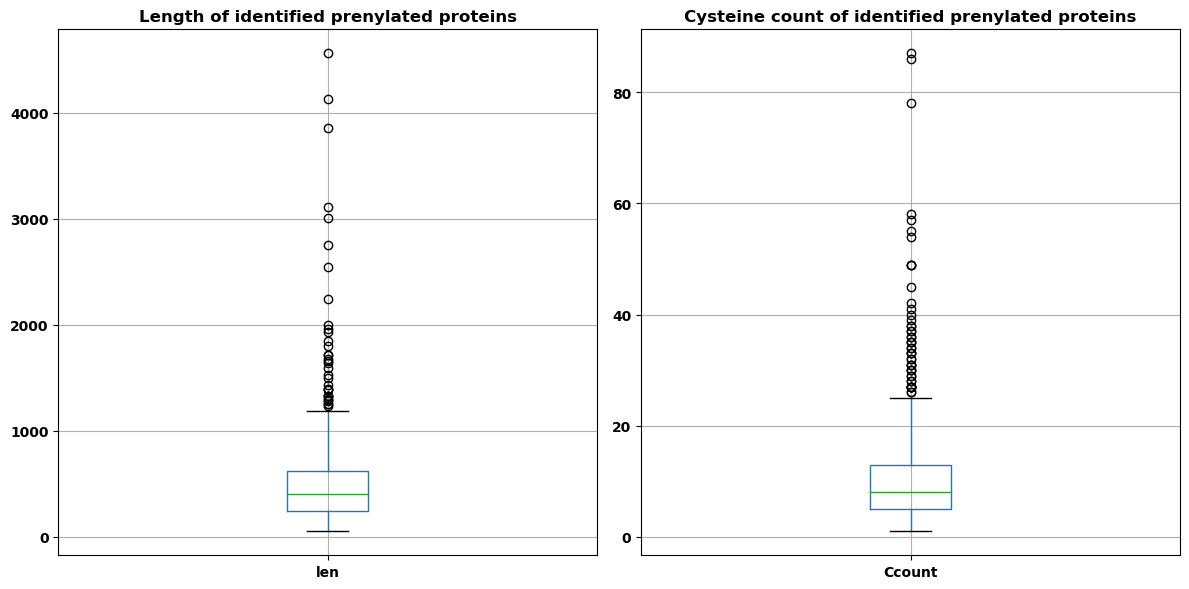

In [6]:
# Data for both plots
cdf = Union

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Create the first box plot
boxplot_len = cdf.boxplot(column=['len'], return_type='dict', ax=axes[0])
caps_len = [item.get_ydata()[1] for item in boxplot_len['caps']]
axes[0].set_title('Length of identified prenylated proteins')

# Create the second box plot
boxplot_CCount = cdf.boxplot(column=['Ccount'], return_type='dict', ax=axes[1])
caps_CCount = [item.get_ydata()[1] for item in boxplot_CCount['caps']]
axes[1].set_title('Cysteine count of identified prenylated proteins')

plt.tight_layout()  # Adjust spacing between plots

# save
plt.savefig(os.path.join(figures, 'boxplt_Count_len_identified.png'))

print("Caps for Length:", caps_len)
print("Caps for CCount:", caps_CCount)

In [7]:
print(len(TE_prot))

# remove the identified prenylated proteins
TE_prot = TE_prot[~TE_prot.loc[:,'Protein IDs'].isin(Union['ID'])].reset_index(drop=True)

print(len(TE_prot))

# remove the known prenylated proteins
TE_prot = TE_prot[~TE_prot.loc[:,'Protein IDs'].isin(known['ID'])].reset_index(drop=True)

print(len(TE_prot))

# remove the proteins identified in any other experiment
TE_prot = TE_prot[~TE_prot.loc[:,'Protein IDs'].isin(cntr_Faz['ID'])].reset_index(drop=True)
print(len(TE_prot))
TE_prot = TE_prot[~TE_prot.loc[:,'Protein IDs'].isin(FTI_Faz['ID'])].reset_index(drop=True)
print(len(TE_prot))
TE_prot = TE_prot[~TE_prot.loc[:,'Protein IDs'].isin(Faz_only['ID'])].reset_index(drop=True)
print(len(TE_prot))

5571
5205
5188
5140
5133
5128


In [8]:
# only keep ID and Sequence length columns
TEback = TE_prot.loc[:, ['Protein IDs', 'Sequence length']]

# Filter for proteins of length 58-904 (from min and max caps of identified prenylated proteins, see boxplot above)
TE_prot = TE_prot[(TE_prot['Sequence length'] >= 52) & (TE_prot['Sequence length'] <= 1192)]

In [9]:
# get FASTA sequence of the remaining proteins, used to filter for internal C count between 1 and 25
# create uniprot sparql readable input for all background TE proteins
up_input = ' '.join([s for s in TE_prot.loc[:, 'Protein IDs'].unique()])

In [10]:
# FASTA file of filtered TE proteins, downloaded from uniprot 
# uniprot-download canonical sequences
fasta = read_fastafile(os.path.join(datafolder, 'fasta_files', 'idmapping_2024_04_17_canon.fasta'))

In [11]:
# check for discrepancies
TE_prot[~TE_prot.loc[:, 'Protein IDs'].isin(fasta.loc[:, 'ID'])].reset_index(drop=True)

# 4,534 active entries and 2 obsolete entries are found

,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,id,Peptide IDs,Peptide is razor,Mod. peptide IDs,Evidence IDs,MS/MS IDs,Best MS/MS,Oxidation (M) site IDs,Oxidation (M) site positions,Taxonomy IDs
0,C9J442,C9J442,1,1,1,Uncharacterized protein C22orf46,C22orf46,sp|C9J442|CV046_HUMAN Uncharacterized protein ...,1,1,...,61,46581,True,47359,1273626;1273627;1273628,721096,721096,44,83,9606
1,O15533,O15533,4,4,4,Tapasin,TAPBP,sp|O15533|TPSN_HUMAN Tapasin OS=Homo sapiens O...,1,4,...,335,17232;17663;21875;24325,True;True;True;True,17334;17766;21997;24469,468317;468318;468319;468320;468321;468322;4683...,271071;271072;271073;271074;271075;271076;2778...,271073;277866;347571;390276,NaN,NaN,9606
2,O95336,O95336,14,14,14,6-phosphogluconolactonase,PGLS,sp|O95336|6PGL_HUMAN 6-phosphogluconolactonase...,1,14,...,694,441;12139;12704;14824;24989;26736;30782;34183;...,True;True;True;True;True;True;True;True;True;T...,445;12217;12783;14920;25136;26891;30955;34367;...,11418;11419;11420;11421;11422;11423;11424;1142...,6646;6647;6648;6649;6650;6651;6652;6653;6654;6...,6662;191734;200193;231568;401741;429016;488781...,NaN,NaN,9606
3,O95379,O95379,5,5,5,Tumor necrosis factor alpha-induced protein 8,TNFAIP8,sp|O95379|TFIP8_HUMAN Tumor necrosis factor al...,1,5,...,702,13037;38529;38813;41793;60067,True;True;True;True;True,13121;38778;39068;42084;60912,353173;353174;353175;353176;353177;353178;3531...,205427;205428;205429;205430;205431;205432;2054...,205430;603449;607674;650790;931890,NaN,NaN,9606
4,P04439,P04439,22,22,12,"HLA class I histocompatibility antigen, A-3 al...",HLA-A,sp|P04439|HLAA_HUMAN HLA class I histocompatib...,1,22,...,835,4136;4422;7823;7824;15077;15664;21263;27950;43...,True;True;True;True;True;True;True;True;True;T...,4169;4457;7885;7886;15174;15761;21380;28112;43...,114545;114546;114547;114548;114549;114550;1145...,68378;68379;68380;68381;68382;68383;68384;6838...,68401;72926;126672;126702;235440;244911;337468...,205,213,9606
5,P06703,P06703,3,3,3,Protein S100-A6,S100A6,sp|P06703|S10A6_HUMAN Protein S100-A6 OS=Homo ...,1,3,...,875,759;34312;35057,True;True;True,764;34497;35247,21051;21052;21053;21054;21055;21056;21057;2105...,12716;12717;12718;12719;12720;12721;12722;1272...,12726;542524;553983,NaN,NaN,9606
6,P13796,P13796,46,46,40,Plastin-2,LCP1,sp|P13796|PLSL_HUMAN Plastin-2 OS=Homo sapiens...,1,46,...,1072,131;1107;2986;5960;5961;11337;11377;11378;1198...,True;True;True;True;True;True;True;True;True;T...,131;1117;1118;3012;6008;6009;11413;11453;11454...,3263;3264;3265;3266;3267;3268;3269;3270;3271;3...,1886;1887;1888;1889;1890;1891;1892;1893;1894;1...,1894;18722;49898;98299;98334;179763;180419;180...,355;356;357,12;146;337,9606
7,P26447,P26447,9,9,9,Protein S100-A4,S100A4,sp|P26447|S10A4_HUMAN Protein S100-A4 OS=Homo ...,1,9,...,1335,760;2912;12735;12736;34426;34578;48743;53372;6...,True;True;True;True;True;True;True;True;True,765;2937;12814;12815;34614;34767;49533;54183;6...,21097;21098;21099;21100;21101;21102;21103;2110...,12746;12747;48522;48523;48524;48525;48526;4852...,12746;48561;200676;200683;544166;546762;749072...,NaN,NaN,9606
8,P30048,P30048,14,14,14,"Thioredoxin-dependent peroxide reductase, mito...",PRDX3,sp|P30048|PRDX3_HUMAN Thioredoxin-dependent pe...,1,14,...,1399,1627;1628;3804;8829;8830;10059;19388;20623;206...,True;True;True;True;True;True;True;True;True;T...,1642;1643;3835;8894;8895;10132;19497;20737;207...,44246;44247;44248;44249;44250;44251;44252;4425...,26245;26246;26247;26248;26249;26250;26251;2625...,26268;26305;63336;142256;142257;161532;307573;...,NaN,NaN,9606
9,P31949,P31949,7,7,7,"Protein S100-A11;Protein S100-A11, N-terminall...",S100A11,sp|P31949|S10AB_HUMAN Protein S100-A11 OS=Homo...,1,7,...,1448,6380;8028;9150;26439;42052;53579;62664,True;True;True;True;True;True;True,6432;8091;9219;26593;42344;54393;63518,176907;176908;176909;176910;176911;176912;1769...,105104;10

In [12]:
# add count of C in fasta file of background proteins
fasta['Ccount'] = fasta['seq'].str.count('C')

In [13]:
# Filter for Ccount between 1 and 25 as in min and max caps of identified prenylated proteins (see boxplot above)
fasta = fasta[(fasta['Ccount'] >= 1) & (fasta['Ccount'] <= 25)]

In [14]:
# annotate the position of the first C counting from the end of the sequence backwards
fasta['Cpos'] = [-next((pos for pos, amino in enumerate(reversed(seq), 1) if amino == 'C'), 0) for seq in fasta['seq']]

In [15]:
# The most C-terminal cysteine to be prenylated in canonical motif or new C-term motif is -5
# Exclude all background proteins that have Cpos equal or bigger than -5
fasta = fasta[fasta['Cpos'] < -5].reset_index(drop=True)

In [16]:
# Check isoforms for canonical or new C-term motifs
up_input = ' '.join([s for s in fasta.loc[:, 'ID'].unique()])

In [17]:
# uniprot-download isoforms sequences
fasta_iso = read_fastafile(os.path.join(datafolder, 'fasta_files', 'idmapping_2024_04_17_iso.fasta'))

In [18]:
# clean ID column
fasta_iso = fasta_iso[fasta_iso['seqID'].str.contains('-')]
fasta_iso['ID'] = fasta_iso['ID'].str.split('-', n=1).str[0]

# annotate the position of the first C counting from the end of the sequence backwards
fasta_iso['Cpos'] = [-next((pos for pos, amino in enumerate(reversed(seq), 1) if amino == 'C'), 0) for seq in fasta_iso['seq']]

# The most C-terminal cysteine to be prenylated in canonical motif or new C-term motif is -5
# Keep all IDs that have Cpos equal or bigger than -5
fasta_iso = fasta_iso[fasta_iso['Cpos'] >= -5].reset_index(drop=True)

# remove all isoforms that have 0 cysteines
fasta_iso = fasta_iso[fasta_iso['Cpos'] != 0]

In [19]:
# Remove proteins from background for which we found canonical or new C-terminal motifs in isoforms
fasta = fasta[~fasta['ID'].isin(fasta_iso['ID'])]

In [20]:
# UniProt query with the remaining background proteins
up_input = ' '.join(['uniprotkb:' + str(s) for s in fasta['ID'].unique()])

In [21]:
# Load filtered background proteins exactly as it came out from the uniprot download, based on SPARQL query 3
uniprot = pd.read_csv(os.path.join(datafolder, 'UniProt_SPARQL_queries', 'up_output_background_17.04.24.csv'), sep=';', encoding='UTF-8')
uniprot = uniprot[uniprot['primaryAccession'].isin(fasta['ID'])]

In [22]:
# Preprocess raw UniProt output
# e.g. rename columns, clean strings from unnecessary additions, transform all locations containing "membrane" to just membrane,
# remove double entries, change type to integer where needed etc.
uniprot = preprocess_background(uniprot)

# aggregate df by ID and clean (remove brackets etc.)
uniprot = uniprot.groupby('ID').agg(set).reset_index()
uniprot = clean_agg(uniprot)

In [23]:
# Filter for reviewed entries only
uniprot = uniprot[uniprot['ProteinEntryReviewed'] == 'true'].reset_index(drop=True)

# Filter for Membrane in location
uniprot = uniprot[(uniprot.loc[:, 'location']).isin(['Membrane'])].reset_index(drop=True)

# In fasta keep only these uniprot proteins by matching on ID
background = fasta[fasta.loc[:,'ID'].isin(uniprot.loc[:, 'ID'])].reset_index(drop=True)

In [24]:
len(background)

804

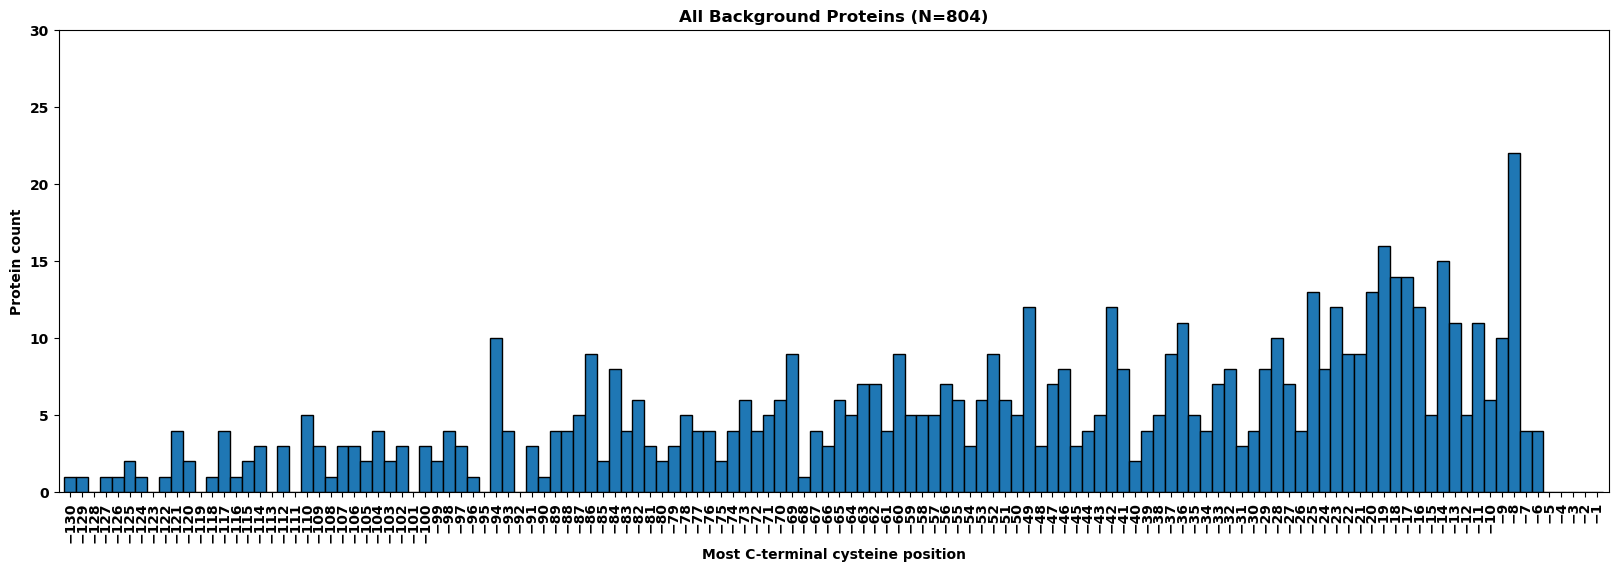

In [25]:
# Histogram of most C-terminal cysteine positions in background

pos = background['Cpos']

# Filter data within the range from -100 to -1
filtered_data = [x for x in pos if -130 <= x <= -1]

# Specify the desired bin edges
bin_edges = list(range(-130, 1))

# Set the figure size (adjust these values as needed)
plt.figure(figsize=(20, 6))

# Create a histogram with custom bin edges
plt.hist(filtered_data, bins=bin_edges, edgecolor='black', align='left')
plt.xlabel('Most C-terminal cysteine position')
plt.ylabel('Protein count')
plt.title(f'All Background Proteins (N={len(pos)})')

# Customize x-axis ticks and labels
plt.xticks(range(-130, 0), rotation=90)

# Set x-axis limits to match the data range
plt.xlim(-131, -0)
plt.ylim(0, 30)

# Show the plot
plt.show()

In [26]:
# N-termninal plot
# get the position of the most N-terminal cysteine per protein
background['mostNpos'] = background['seq'].apply(lambda x: int(x.find('C') + 1))

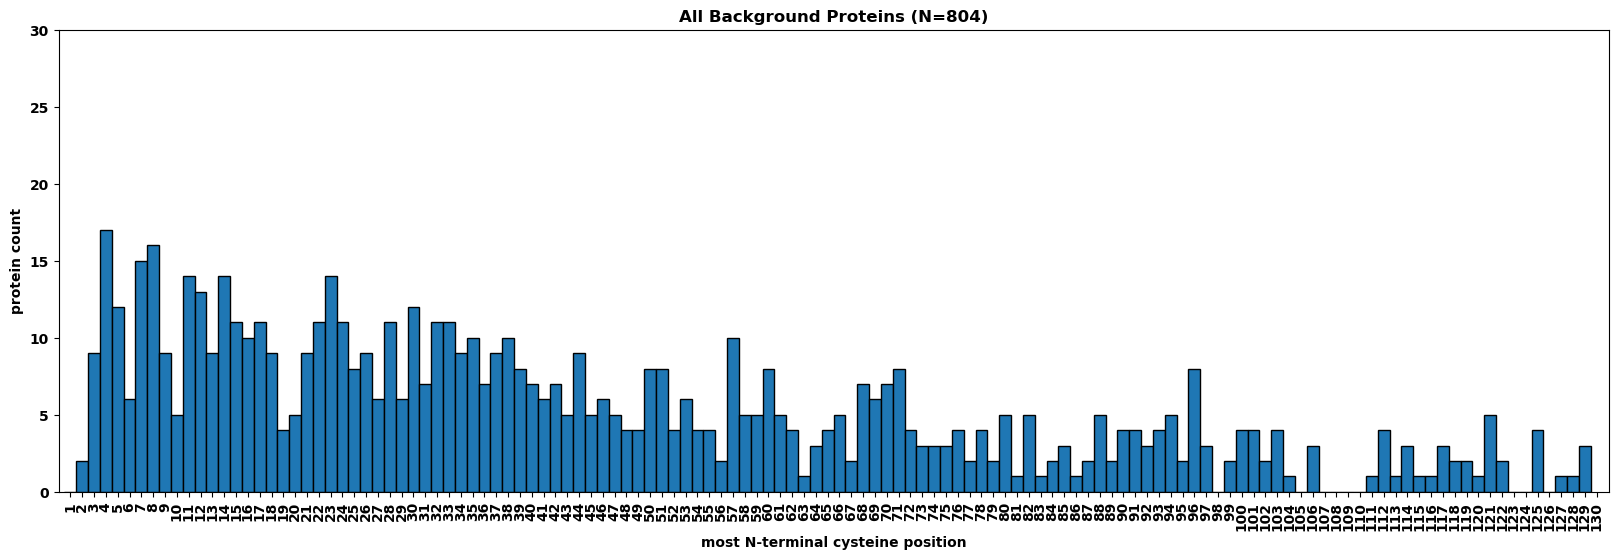

In [27]:
# Histogram of one most N-terminal cysteine position per protein, internal

pos = background['mostNpos']

# Filter data within the range from 0 to 130
filtered_data = [x for x in pos if 0 <= x < 131]

# Specify the desired bin edges
bin_edges = list(range(1, 131))

# Set the figure size (adjust these values as needed)
plt.figure(figsize=(20, 6))

# Create a histogram with custom bin edges
plt.hist(filtered_data, bins=bin_edges, edgecolor='black', align='left')
plt.xlabel('most N-terminal cysteine position')
plt.ylabel('protein count')
plt.title(f'All Background Proteins (N={len(pos)})')

# Set custom x-tick values and labels
plt.xticks(range(1, 131))
plt.xticks(rotation=90)

# Set x-axis limits to match the data range
plt.xlim(0, 131)
plt.ylim(0, 30)

plt.show()

In [28]:
background = background.drop(columns=['mostNpos', 'Cpos'])

In [29]:
# Save 
background.to_csv(os.path.join(datafolder, 'total_extracts_GG_F', 'clean_background.csv'), index=None, sep=',')